<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPrepBlipGlitches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install --target=$nb_path gwpy --upgrade

  Using cached https://files.pythonhosted.org/packages/2d/e6/14f8cefc3ebd73e062323ed94ecc2ea943b3ab69137b2b9fc9df4087a9bc/gwpy-0.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d6/9e/616124723b7a8f2a5399f9288b056bb31f37222b0b7cae46f6bafaa42154/gwdatafind-1.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/46/ae6773894f7eacf53308086287897ec568eac9768918d913d5b9d366c5db/numpy-1.17.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6d/ff/67426ce11f9f3432e020f5d5ef796e1d8e1c2a76b555c8705177f4347f99/gwosc-0.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df/ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packag

In [0]:
import gwpy

In [0]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1', 1133090460-2, 1133090460+2)

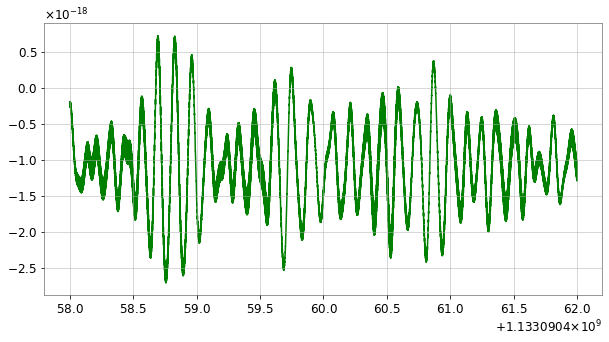

In [315]:
t_value = np.linspace(1133090460-2, 1133090460+2, num = np.array(data).size)
f, (ax) = plt.subplots(1, 1)
f.set_size_inches(10,5)
ax.plot(t_value, data, 'g')

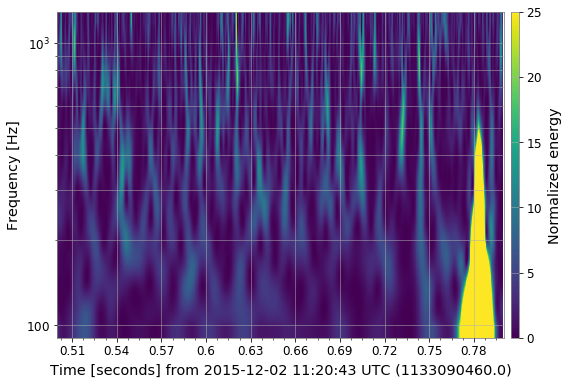

In [316]:
qtrans = data.q_transform(
    #whiten=False,  # already white
    #qrange=(4, 150),  # wider Q-transform range
    outseg=(1133090460.5, 1133090460.8),  # region of interest
)
plot = qtrans.imshow(figsize=[8, 6])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_epoch(1133090460)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 25])
plot.show()